# Classifying Reviews with Machine Learning



In this project I use a set of reviews which are labelled positive and negative and use them to create a classification model. I then scrape reviews from Trip Advisor and predict the sentiment.
As a training file we will use yelp reviews.

# Model Creation

In [ ]:
#@title
import pandas as pd
from textblob import TextBlob
import nltk
import numpy as np
nltk.download('punkt')

yelpdata = pd.read_csv("https://raw.githubusercontent.com/lukejohnsaid1989/piRate/master/yelpreview.csv")
yelpdata = yelpdata.sample(frac=1).reset_index(drop=True)

def getMinSentiment(text):
  blob = TextBlob(text)
  senti = [sentence.sentiment.polarity for sentence in blob.sentences]
  return(min(senti))

def getMaxSentiment(text):
  blob = TextBlob(text)
  senti = [sentence.sentiment.polarity for sentence in blob.sentences]
  return(max(senti))

yelpdata["minsentiment"] = [getMinSentiment(x) for x in yelpdata["text"]]
yelpdata["maxsentiment"] = [getMaxSentiment(x) for x in yelpdata["text"]]

import plotly.express as px
fig = px.scatter(yelpdata, x="minsentiment", y="maxsentiment", color="class")
fig.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#@title
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

le = preprocessing.LabelEncoder()

bound = 0.5
n = round(bound*len(yelpdata))

train = yelpdata[1:n]
test = yelpdata[n:len(yelpdata)]

features=list(zip(train["minsentiment"],train["maxsentiment"]))

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)
model.fit(features,train["class"])

testfeatures=list(zip(test["minsentiment"],test["maxsentiment"]))

predicted = model.predict(testfeatures)

print(confusion_matrix(test["class"], predicted))
myconf = confusion_matrix(test["class"], predicted)
good = (myconf[0,0] + myconf[1,1]) / ( (myconf[0,0] + myconf[0,1] + myconf[1,0] + myconf[1,1]))
print("Accuracy of model is " + str(round(good*100,2)) + "%")

testDatafram = pd.DataFrame({
    "text":test["text"],
    "real_class":test["class"],
    "pred_class":predicted
})

testDatafram

[[198  40]
 [ 67 193]]
Accuracy of model is 78.51%


,text,real_class,pred_class
498,This was my first and only Vegas buffet and it...,1,0
499,"Sadly, Gordon Ramsey's Steak is a place we sha...",0,0
500,Must have been an off night at this place.,0,0
501,My friend loved the salmon tartar.,1,1
502,But I don't like it.,0,0
...,...,...,...
991,walked in and the place smelled like an old gr...,0,0
992,Ordered a double cheeseburger & got a single p...,0,0
993,"The guys all had steaks, and our steak loving ...",1,1
994,very slow at seating even with reservation.,0,0


# Scrape and predict



In [ ]:
#@title
import requests
from bs4 import BeautifulSoup

codes = ["g190317-d8092711"]

url = "https://www.tripadvisor.com/Restaurant_Review-INSERTCODEHERE.html"
url2 = "https://www.tripadvisor.com/Restaurant_Review-INSERTCODEHERE-Reviews-or"
url3 = ".html"
 
def scrape(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    return soup
soup = scrape(url)
 
headingall = []
reviewbodyall = []

for site in codes:
  x=1
  while (x<=10):
    if (x==1):
      soup = scrape(url.replace("INSERTCODEHERE",site))
    else:
      newurl = url2.replace("INSERTCODEHERE",site) + str((x-1)*10) + url3
      soup = scrape(newurl)
    heading = [str(x.text) for x in soup.find_all(class_= "noQuotes")]
    reviewbody = [str(x.text) for x in soup.find_all(class_='partial_entry')]
    for z in heading:
      headingall.append(z)
    for z in reviewbody:
      reviewbodyall.append(z)  
    x=x+1
 
Reviewdata = pd.DataFrame({
    "review_body":reviewbodyall,
    "review_head":headingall
})


Reviewdata.head()

,review_body,review_head
0,Excellent value for money and fast service. T...,Cheap and good
1,Visited multiple times. Food quality is averag...,"Average quality food, good service"
2,"Lovely cafe, perfect for lunch. Waitress was v...",Perfect for lunch
3,Food is inconsistent. Service wasn't that bad....,Poor
4,U visited the place after some 10 years. The p...,Fast lunch


In [ ]:
#@title
Reviewdata["combined"] = Reviewdata["review_head"] + ". " + Reviewdata["review_body"]
Reviewdata["minsentiment"] = [getMinSentiment(x) for x in Reviewdata["combined"]]
Reviewdata["maxsentiment"] = [getMaxSentiment(x) for x in Reviewdata["combined"]]

revfeatures=list(zip(Reviewdata["minsentiment"],Reviewdata["maxsentiment"] ))
predicted_rev = model.predict(revfeatures)

Reviewdata["predicted_review"] = predicted_rev

fig = px.scatter(Reviewdata, x="minsentiment", y="maxsentiment", color="predicted_review")
fig.show()
print(revfeatures)
print(testfeatures)
Reviewdata = Reviewdata.drop_duplicates()

[(0.55, 1.0), (0.0, 0.48666666666666664), (0.2879464285714286, 1.0), (-0.6999999999999998, 0.35), (0.0, 0.6619047619047619), (0.0, 1.0), (0.0, 0.5), (0.0, 0.78), (-1.0, 0.10999999999999999), (-0.5, 0.7), (0.0, 0.11845238095238095), (0.35555555555555557, 0.678), (-0.1875, 0.24450000000000002), (0.0, 0.265), (-0.5, 1.0), (0.55, 1.0), (0.0, 0.48666666666666664), (0.2879464285714286, 1.0), (-0.6999999999999998, 0.35), (0.0, 0.6619047619047619), (0.0, 1.0), (0.0, 0.5), (0.0, 0.78), (-1.0, 0.10999999999999999), (-0.5, 0.7), (0.55, 1.0), (0.0, 0.48666666666666664), (0.2879464285714286, 1.0), (-0.6999999999999998, 0.35), (0.0, 0.6619047619047619), (0.0, 1.0), (0.0, 0.5), (0.0, 0.78), (-1.0, 0.10999999999999999), (-0.5, 0.7), (0.55, 1.0), (0.0, 0.48666666666666664), (0.2879464285714286, 1.0), (-0.6999999999999998, 0.35), (0.0, 0.6619047619047619), (0.0, 1.0), (0.0, 0.5), (0.0, 0.78), (-1.0, 0.10999999999999999), (-0.5, 0.7), (0.55, 1.0), (0.0, 0.48666666666666664), (0.2879464285714286, 1.0), (-

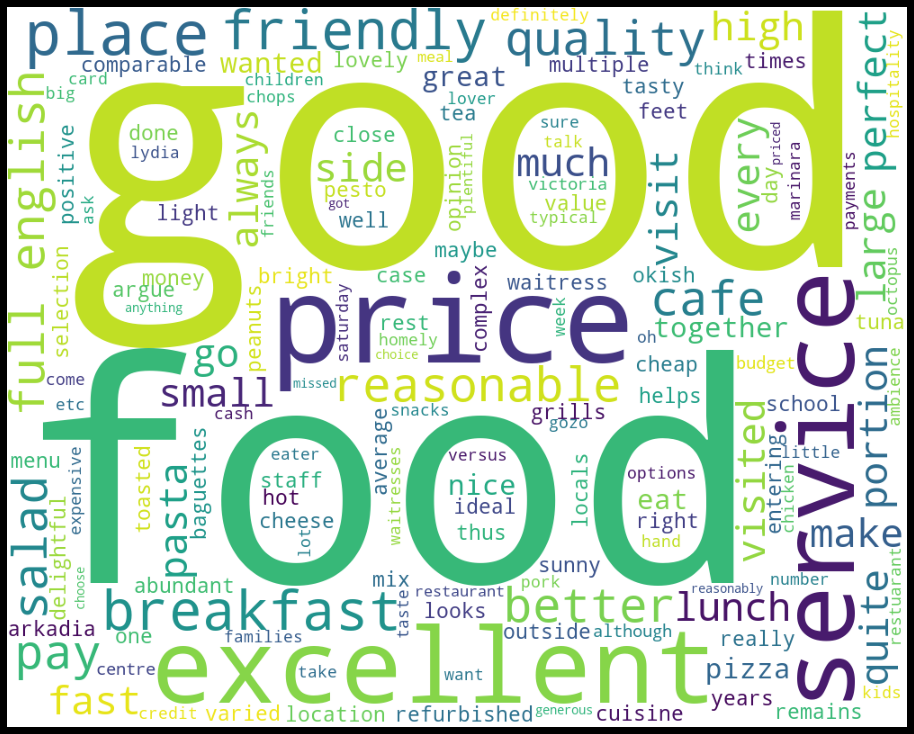

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib
import matplotlib.pyplot as plt

GoodData = Reviewdata[Reviewdata["minsentiment"] > -0.5]

text = " ".join(title for title in GoodData["review_body"])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords, background_color="white",width=1000, height=800).generate(text.lower())
plt.figure(figsize=(15,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)


In [ ]:
groups = Reviewdata.groupby(['predicted_review']).count()
groups["predicted_review"] = groups.index
groups

,review_body,review_head,combined,minsentiment,maxsentiment,predicted_review
predicted_review,,,,,,
0,6,6,6,6,6,0
1,9,9,9,9,9,1


In [ ]:
fig = px.pie(groups, values='review_body', names='predicted_review', title='Review Classifications counts')
fig.show()


In [ ]:
print(GoodData)

                                          review_body  ... predicted_review
0   Excellent value for money and fast service.  T...  ...                1
1   Visited multiple times. Food quality is averag...  ...                1
2   Lovely cafe, perfect for lunch. Waitress was v...  ...                1
4   U visited the place after some 10 years. The p...  ...                1
5   The food is okish but abundant. The menu is qu...  ...                1
6   Good food at reasonable prices, good for snack...  ...                1
7   We come here every week. Together with our fri...  ...                1
10  This is is the restuarant to visit if you you ...  ...                0
11  Ambience - nice\nService - very good and very ...  ...                1
12  Great little restaurant/cafe always a plentifu...  ...                0
13  A small friendly cafe with great choice of foo...  ...                0

[11 rows x 6 columns]
